In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

In [2]:
def gamma_transform(im, c, g):
    '''
    This function performs gamma transformation on all values within an image
    Inputs:
        im: Image (np.array). In formula 3-5 this would be "r"
        c: Scalar constant
        g: Power constant
    
    Outputs:
        s: Transformed image. 
    '''
    if len(im.shape) == 2:
        typ = type(im[0,0])
    else: 
        typ = type(im)
    s = c*np.power(im, g)
    s = s.astype(typ)
    
    return s

In [3]:
def alt_transform(im, c, g):
    s0 = gamma_transform(np.min(im), c, g)
    s1 = gamma_transform(np.max(im), c, g)
    old_range = (np.max(im) - np.min(im))
    new_range = (s1-s0)
    t = ((im - np.min(im))*new_range / old_range) + s0
    


    return t

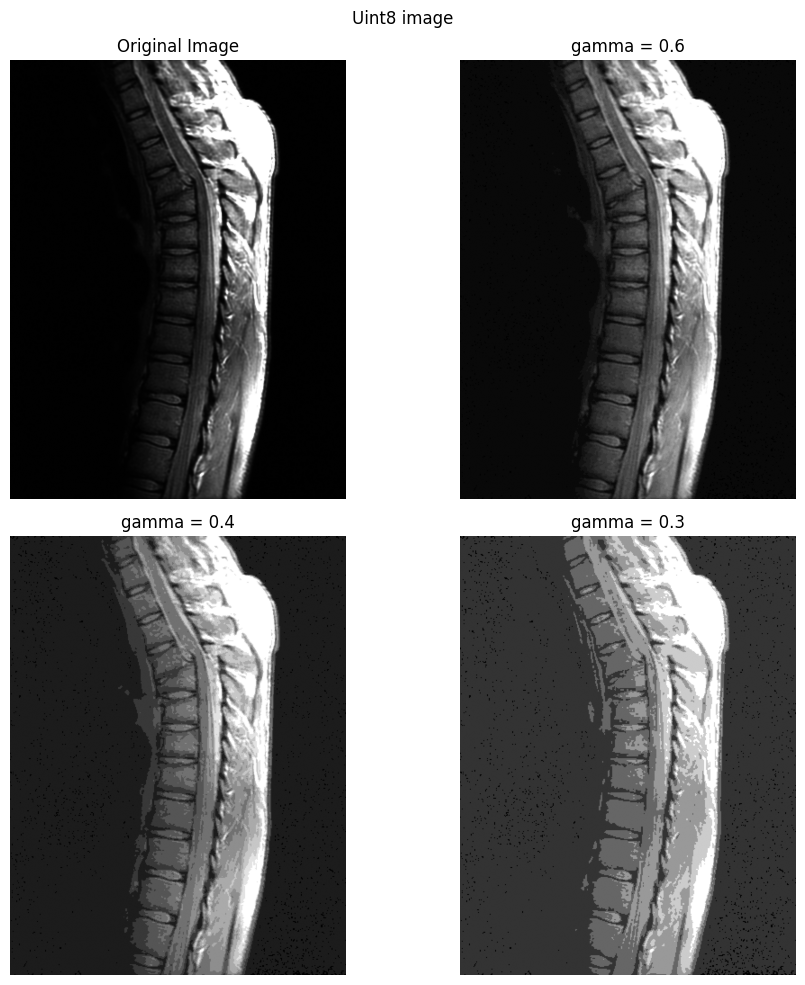

In [4]:
#Subtask a 
path = 'Data/Fig0308(a)(fractured_spine).tif'
img2 = Image.open(path)
img2 = np.asarray(img2).astype(np.uint8)

fig2, ay = plt.subplots(2,2, figsize=(10,10))
ay[0,0].imshow(img2, cmap='gray')
ay[0,0].set_title('Original Image')

ay[0,1].imshow(gamma_transform(img2, 1, 0.6), cmap='gray')
ay[0,1].set_title('gamma = 0.6')

ay[1,0].imshow(gamma_transform(img2, 1, 0.4), cmap='gray')
ay[1,0].set_title('gamma = 0.4')

ay[1,1].imshow(gamma_transform(img2, 1, 0.3), cmap='gray')
ay[1,1].set_title('gamma = 0.3')

for a in ay.ravel():
    a.set_axis_off()

fig2.suptitle('Uint8 image')
plt.tight_layout()

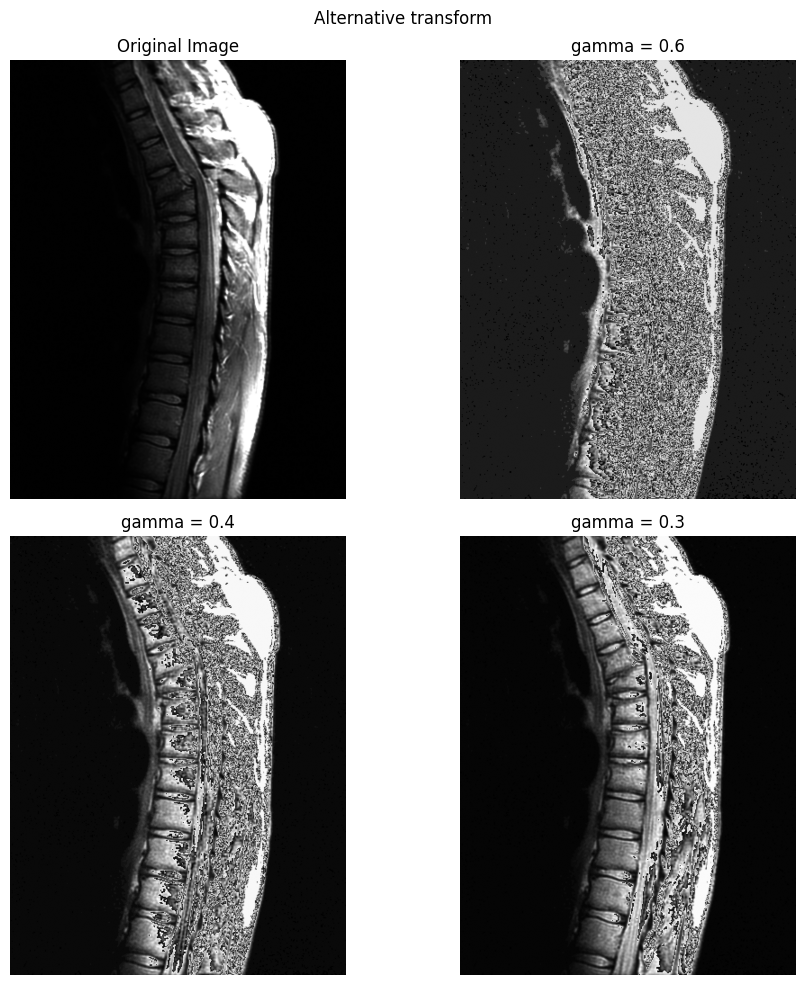

In [5]:
#Subtask b
path = 'Data/Fig0308(a)(fractured_spine).tif'
img3 = Image.open(path)
img3 = np.asarray(img3).astype(np.uint8)

fig3, az = plt.subplots(2,2, figsize=(10,10))
az[0,0].imshow(img3, cmap='gray')
az[0,0].set_title('Original Image')

az[0,1].imshow(alt_transform(img3, 1, 0.6), cmap='gray')
az[0,1].set_title('gamma = 0.6')

az[1,0].imshow(alt_transform(img3, 1, 0.4), cmap='gray')
az[1,0].set_title('gamma = 0.4')

az[1,1].imshow(alt_transform(img3, 1, 0.3), cmap='gray')
az[1,1].set_title('gamma = 0.3')

for a in az.ravel():
    a.set_axis_off()

fig3.suptitle('Alternative transform')
plt.tight_layout()
plt.show()